In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dogs.csv')

In [3]:
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [4]:
df.shape

(11, 3)

In [5]:
feature_names = df.columns[1:].tolist()

In [6]:
feature_names

['height', 'weight']

In [7]:
X = df[feature_names]

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')

In [12]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [13]:
model.labels_

array([10,  5,  7,  8,  9,  6,  3,  4,  1,  2,  0], dtype=int64)

In [14]:
model.children_

array([[ 0,  8],
       [ 4, 10],
       [ 6,  5],
       [11,  2],
       [14,  9],
       [15,  1],
       [16, 13],
       [17,  3],
       [18, 12],
       [19,  7]])

In [15]:
import matplotlib.pyplot as plt

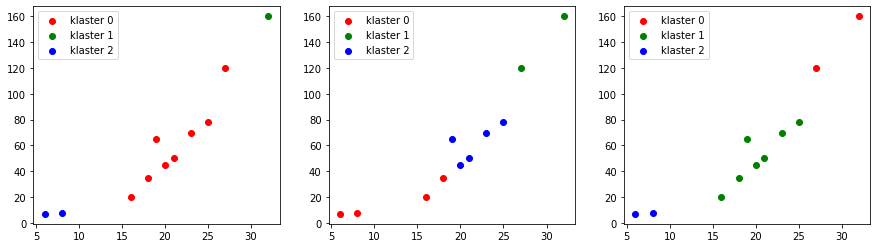

In [16]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(15,4))

n_clusters = 3
for i, link in enumerate(['single', 'complete', 'average']):
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    model.fit(X)
    
    df['label'] = model.labels_
    
    fig.add_subplot(1, n_clusters, i + 1)
    
    for cluster_label in range(n_clusters):
        cluster = df[df['label'] == cluster_label]
        
        plt.scatter(cluster['height'], cluster['weight'], color=colors[cluster_label], marker='o', label=f'klaster {cluster_label}')
        
    plt.legend(loc='best')
plt.show()

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
df = pd.read_csv('../dogs.csv')

In [19]:
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [20]:
df.set_index('breed', inplace=True)

In [21]:
df.head()

,height,weight
breed,,
Border Collie,20,45
Boston Terrier,16,20
Brittany Spaniel,18,35
Bullmastiff,27,120
Chihuahua,8,8


In [22]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=feature_names)

In [23]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [24]:
Z = linkage(X)

In [25]:
Z.shape

(10, 4)

In [26]:
Z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 2.        , 11.        ,  0.10094068,  3.        ],
       [ 9.        , 14.        ,  0.1246148 ,  4.        ],
       [ 1.        , 15.        ,  0.1246148 ,  5.        ],
       [13.        , 16.        ,  0.15167269,  7.        ],
       [ 3.        , 17.        ,  0.28508383,  8.        ],
       [12.        , 18.        ,  0.31753116, 10.        ],
       [ 7.        , 19.        ,  0.32454896, 11.        ]])

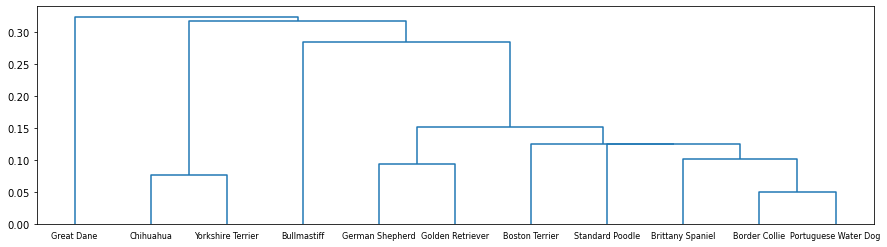

In [52]:
fig = plt.figure(figsize=(15,4))
dendrogram(Z, labels=df.index, leaf_font_size=8, color_threshold=0)
plt.show()

In [46]:
from scipy.cluster.hierarchy import fcluster

In [53]:
# dodela oznake (broj izmedju 1 i k) klastera svakoj instanci
# ne spajamo dva klastera izmedju kojih je rastojanje vece od 0.2
threshold = 0.2
df['label'] = fcluster(Z, t=threshold, criterion='distance')

In [54]:
df['label'].unique()

array([2, 3, 1, 4], dtype=int32)

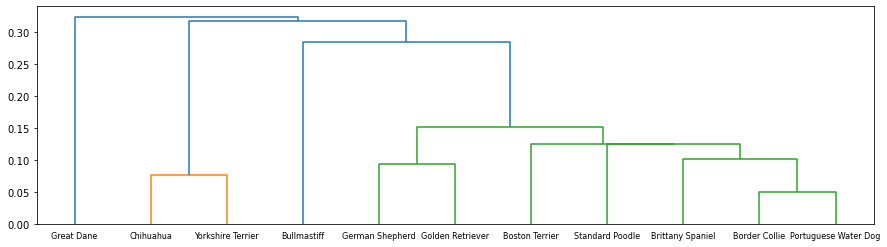

In [56]:
fig = plt.figure(figsize=(15,4))
# plavom bojom su prikazana spajanja klastera koja se ne izvrsavaju
dendrogram(Z, labels=df.index, leaf_font_size=8, color_threshold=threshold)
plt.show()

In [62]:
import numpy as np

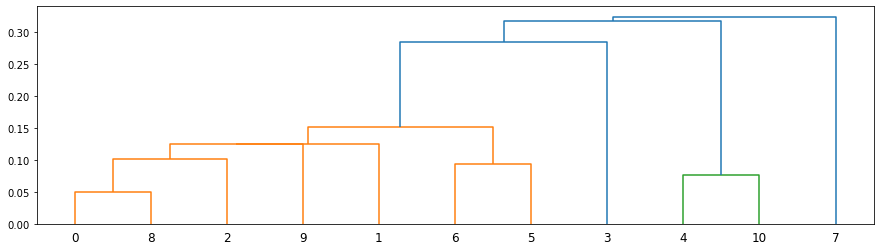

In [61]:
# ako bismo hteli da iscrtamo dendrogram na osnovu AgglomerativeClustering-a
# morali bismo da napravimo matricu spajanja Z, posto funkcija dendrogram to ocekuje kao ulaz
model = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=0)
model.fit(X)

counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)

for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples: # u pitanju je list
            current_count += 1
        else: # u pitanju je unutrasnji cvor
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# matrica treba da ima 4 kolone:
# prve dve kolone su iste kao iz model.children_
# treca kolona - rastojanja izmedju klastera
# cetvrta kolona - broj instanci u formiranom klasteru
linkage_matrix = np.column_stack([model.children_, model.distances_, counts])
fig = plt.figure(figsize=(15,4))
dendrogram(linkage_matrix)
plt.show()

In [64]:
df = pd.read_csv('../dogs.csv')

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [67]:
model = DBSCAN(eps=0.3, min_samples=2)

In [68]:
model.fit(X)

DBSCAN(eps=0.3, min_samples=2)

In [69]:
model.labels_

array([ 0,  0,  0,  0,  1,  0,  0, -1,  0,  0,  1], dtype=int64)

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(X, model.labels_)

0.4306542372423945

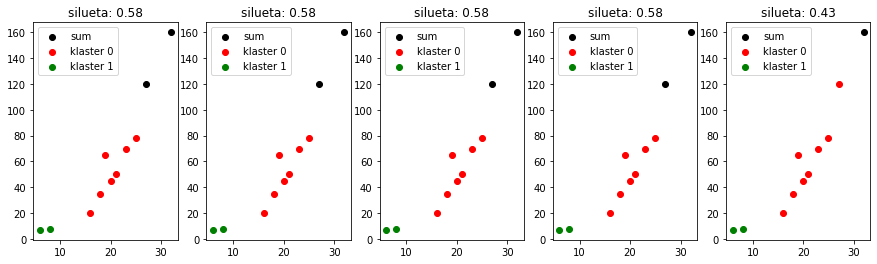

In [72]:
fig = plt.figure(figsize=(15,4))
eps_values = [0.2, 0.225, 0.25, 0.275, 0.3]
for i, eps in enumerate(eps_values):
    model = DBSCAN(eps, min_samples=2)
    model.fit(X)
    
    df['label'] = model.labels_
    
    n_clusters = max(model.labels_) + 1
    
    fig.add_subplot(1, len(eps_values), i + 1)
    
    for cluster_label in range(-1, n_clusters):
        cluster = df[df['label'] == cluster_label]
        if cluster_label == -1:
            plt.scatter(cluster['height'], cluster['weight'], color='black', marker='o', label=f'sum')
        else:
            plt.scatter(cluster['height'], cluster['weight'], color=colors[cluster_label], marker='o', label=f'klaster {cluster_label}')
        
    plt.title(f'silueta: {silhouette_score(X, model.labels_):.2f}')
    plt.legend(loc='best')
    
plt.show()